In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np

In [2]:
# Importing Housing.csv

housing =pd.read_csv('Housing.csv')

In [3]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Converting Yes to 1 and No to 0 using map function

housing['mainroad'] = housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1,'no':0})
housing['basement'] = housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1,'no':0})

In [6]:
# Now let's see the head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [8]:
# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status = pd.get_dummies(housing['furnishingstatus'])

In [9]:
# The result has created three variables that are not needed.
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [10]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status dataframe.
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [11]:
#print status
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [12]:
#Adding the results to the master dataframe i.e housing
housing = pd.concat([housing,status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
# Dropping furnishingstatus from housing data as we have created the dummies for it
housing = housing.drop("furnishingstatus",axis=1)

In [14]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [15]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested you need to calculate area per bedroom
housing['areaperbedroom'] = housing['area'] / housing['bedrooms']

In [16]:
# Create another new Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms'] / housing['bedrooms']

In [17]:
# check head of housing
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [18]:
#defining a normalisation function 
#hint use formula=(x-min(x))/(max(x) - min(x))
def normalize (x): 
    # code here
     return (x - min(x)) / (max(x) - min(x))
                                          
# applying normalize ( ) to all columns using apply function 
housing = housing.apply(normalize)


In [19]:
# print all housing columns available to decide which all variables will be our feature and target variable
print(housing.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')


In [20]:
# Putting feature variable to X
X = housing.drop('price',axis=1)

# Putting response variable to y ie. price
y = housing['price']


In [21]:
# import test_train_split module
from sklearn.model_selection import train_test_split


# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
# Importing statsmodels module as sm
import statsmodels.api as sm

# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)


# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [23]:
lm_1.params

const              0.089201
area               0.496502
bedrooms          -0.088783
bathrooms          0.316852
stories            0.100994
mainroad           0.049669
guestroom          0.030842
basement           0.023794
hotwaterheating    0.074903
airconditioning    0.073103
parking            0.061166
prefarea           0.050466
semi-furnished    -0.010570
unfurnished       -0.038785
areaperbedroom    -0.228391
bbratio           -0.021404
dtype: float64

In [24]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.84
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           3.31e-94
Time:                        20:46:39   Log-Likelihood:                 425.58
No. Observations:                 436   AIC:                            -819.2
Df Residuals:                     420   BIC:                            -753.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0892      0.058     

In [25]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# write magic function matplotlib inline
%matplotlib inline

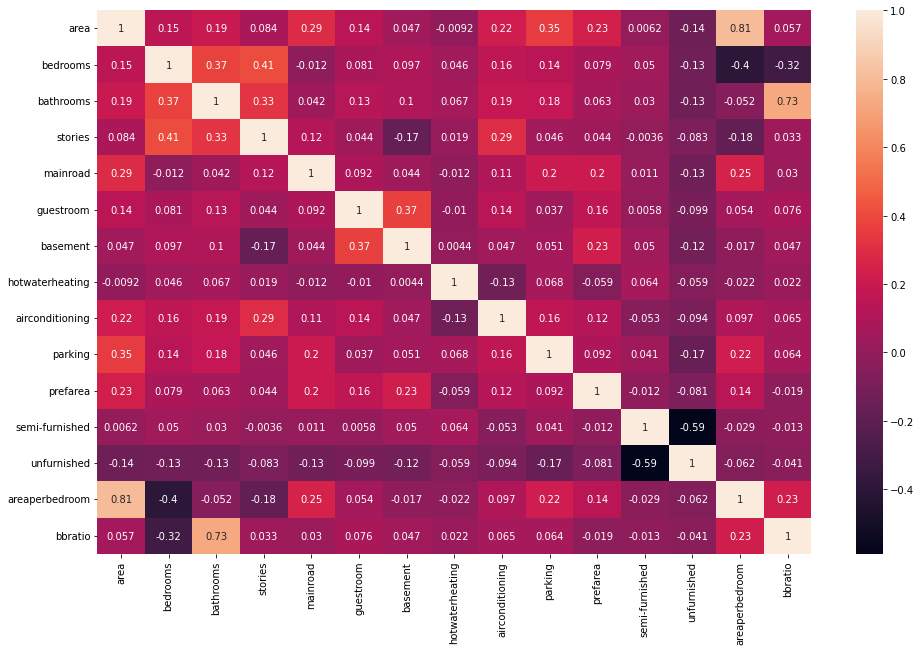

In [26]:
# Let's see the correlation matrix on hoousing data
plt.figure(figsize = (16,10))     # Size of the figure

# plot heatmap and pass correlation matrix with annot parameter
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [27]:
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define vif_scores function as stated above
input_data = pd.DataFrame(X)
def vif_scores(input_data):
    # code here
    vif_scores = pd.DataFrame()
    vif_scores["Feature"] = input_data.columns
    vif_scores["VIF Score"] = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
    return vif_scores


In [28]:
# print vif scores for all current input features
vif_result = vif_scores(input_data)
print(vif_result)

            Feature  VIF Score
0              area  57.516048
1          bedrooms  10.683404
2         bathrooms  11.106354
3           stories   2.805901
4          mainroad   7.910522
5         guestroom   1.492428
6          basement   2.045854
7   hotwaterheating   1.097694
8   airconditioning   1.768615
9           parking   2.007955
10         prefarea   1.509807
11   semi-furnished   2.614252
12      unfurnished   2.382862
13   areaperbedroom  68.707105
14          bbratio  29.249998


In [29]:
# Lets check vif scores again after removing bbratio from features.
removed_data= input_data.drop('bbratio', axis=1)

In [30]:
vif_result = vif_scores(removed_data)
print(vif_result)

            Feature  VIF Score
0              area  20.716025
1          bedrooms  10.026456
2         bathrooms   1.712298
3           stories   2.783201
4          mainroad   7.459237
5         guestroom   1.478756
6          basement   2.027730
7   hotwaterheating   1.093564
8   airconditioning   1.768236
9           parking   2.004052
10         prefarea   1.509389
11   semi-furnished   2.484125
12      unfurnished   2.204838
13   areaperbedroom  18.437262


In [31]:
# Lets check vif scores after removing bedrooms from left features.
removed_data= input_data.drop(['bbratio','bedrooms'], axis=1)

In [32]:
vif_result = vif_scores(removed_data)
print(vif_result)

            Feature  VIF Score
0              area  14.978857
1         bathrooms   1.692180
2           stories   2.559555
3          mainroad   6.099134
4         guestroom   1.475441
5          basement   1.901473
6   hotwaterheating   1.087115
7   airconditioning   1.762488
8           parking   1.999982
9          prefarea   1.504964
10   semi-furnished   2.037729
11      unfurnished   1.722278
12   areaperbedroom  13.881473


In [33]:
# Lets check vif scores after removing areaperbedroom from features which are left.
removed_data= input_data.drop(['bbratio','bedrooms','areaperbedroom'], axis=1)

In [34]:
vif_result = vif_scores(removed_data)
print(vif_result)

            Feature  VIF Score
0              area   4.427217
1         bathrooms   1.619363
2           stories   2.323144
3          mainroad   5.513523
4         guestroom   1.474326
5          basement   1.896942
6   hotwaterheating   1.086273
7   airconditioning   1.760737
8           parking   1.987943
9          prefarea   1.497335
10   semi-furnished   2.004738
11      unfurnished   1.652372


In [35]:
# Lets check vif scores after removing semi-furnished from features which are left.
removed_data= input_data.drop(['bbratio','bedrooms','areaperbedroom','semi-furnished'], axis=1)

In [36]:
vif_result = vif_scores(removed_data)
print(vif_result)

            Feature  VIF Score
0              area   4.362200
1         bathrooms   1.619286
2           stories   2.301304
3          mainroad   4.845386
4         guestroom   1.470984
5          basement   1.860222
6   hotwaterheating   1.081743
7   airconditioning   1.753933
8           parking   1.987700
9          prefarea   1.490106
10      unfurnished   1.341568


In [37]:
# Lets check vif scores after removing basement from features which are left.
removed_data= input_data.drop(['bbratio','bedrooms','areaperbedroom','semi-furnished','basement'], axis=1)

In [38]:
vif_result = vif_scores(removed_data)
print(vif_result)

           Feature  VIF Score
0             area   4.362124
1        bathrooms   1.589915
2          stories   2.206626
3         mainroad   4.583261
4        guestroom   1.291867
5  hotwaterheating   1.079947
6  airconditioning   1.749777
7          parking   1.986493
8         prefarea   1.442071
9      unfurnished   1.340895


In [42]:
print(removed_data.columns)

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')


In [43]:
# Putting feature variable to X
X = housing[['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished']]


# Putting response variable to y ie. price
y=housing['price']


In [44]:
# test train split again on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [45]:
# Adding a constant column to our dataframe
X_train = sm.add_constant(X_train)
   


# Adding  constant variable to test dataframe
X_test = sm.add_constant(X_test)


# create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()


In [46]:
#print model 2 summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     87.20
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.97e-96
Time:                        21:00:28   Log-Likelihood:                 419.57
No. Observations:                 436   AIC:                            -817.1
Df Residuals:                     425   BIC:                            -772.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0366      0.014     

In [47]:
# Making predictions
y_pred = lm_2.predict(X_test)

In [48]:
y_pred

265    0.203544
54     0.456925
171    0.347297
244    0.299561
268    0.265697
         ...   
451    0.194300
320    0.276568
424    0.101382
338    0.209751
373    0.224384
Length: 109, dtype: float64

In [53]:
y_pred.ndim

1

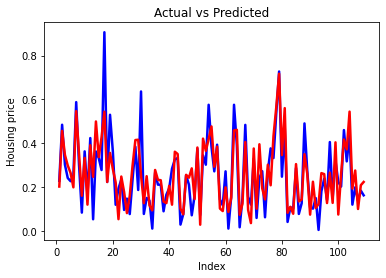

In [56]:
# Actual vs Predicted graph as below
c = [i for i in range(1, 110)] 
fig = plt.figure()

#Plotting Actual
plt.plot(c, y_test, color='blue', linewidth=2.5,linestyle="-",label='Actual')

#Plotting predicted
plt.plot(c, y_pred, color='red', linewidth=2.5,linestyle="-",label='Predicted')

# Plot heading 
plt.title('Actual vs Predicted')

# X-label
plt.xlabel('Index')

# Y-label
plt.ylabel('Housing price')
                      
plt.show()#showing the plot

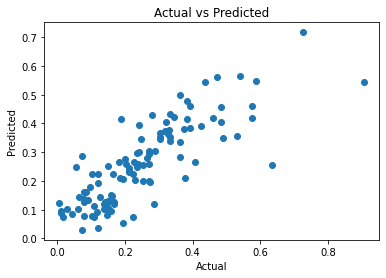

In [58]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)

# Plot heading 
plt.title('Actual vs Predicted')

# X-label
plt.xlabel('Actual')        

# Y-label
plt.ylabel('Predicted')
           
plt.show()

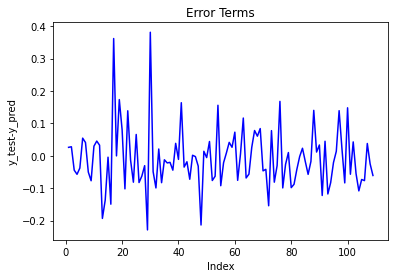

In [60]:
c = [i for i in range(1, 110)] 
fig = plt.figure()
plt.plot(c, y_test-y_pred, color='blue')
plt.title('Error Terms')
plt.xlabel('Index')
plt.ylabel('y_test-y_pred')                      
plt.show()

In [67]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


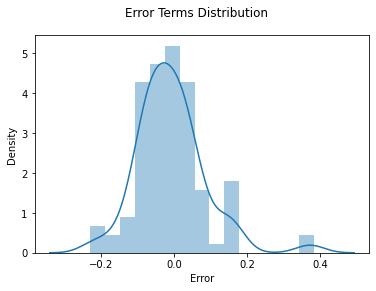

In [68]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()
error_terms = y_test - y_pred
# Plotting the distribution of error terms
sns.distplot(error_terms)

# Plot heading
fig.suptitle('Error Terms Distribution')

# X-label
plt.xlabel('Error')

# Show the plot
plt.show()




In [69]:
#import metrics module
from sklearn import metrics

#calculate and print RMSE
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.09444107887381048


In [70]:
#calculate and print MSE
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.008919117378849291


In [71]:
#calculate and print MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.06918569527477426


In [72]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [74]:
# Initializing linearRegression function 
lm = LinearRegression()


# Iitialising RFE using above model
rfe = RFE(estimator=lm)
       

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train, y_train)


# Printing the boolean results for each features
print(rfe.support_)


# Printing the ranks for each features
print(rfe.ranking_)
 

[False  True  True  True False False  True  True False False False]
[7 1 1 1 4 5 1 1 2 3 6]


In [77]:
#Print the total no. of features in X
print("Total number of features in X:", len(X))


#Get columns which are supported by RFE
col= X_train.columns[rfe.support_]


# print col
print(col)



Total number of features in X: 545
Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning'], dtype='object')


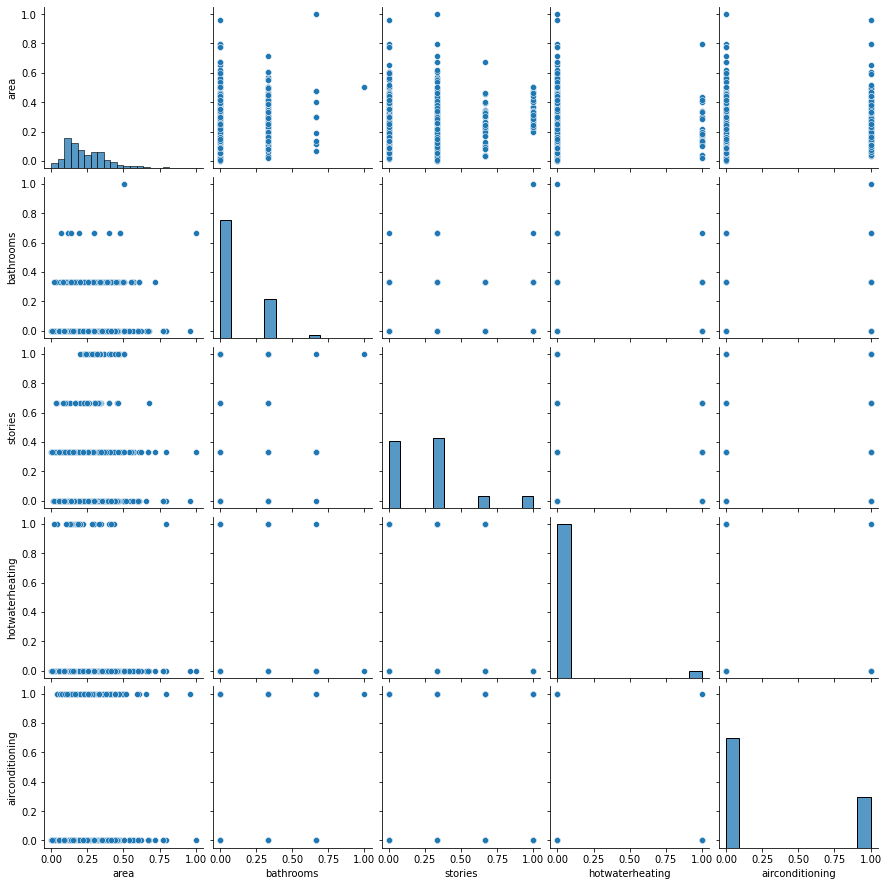

In [78]:
# Let's plot a pair plot of all RFE selected variables in housing dataframe
import seaborn as sns
selected_features = housing[col]
sns.pairplot(selected_features)
plt.show()

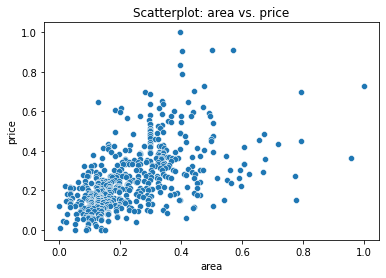

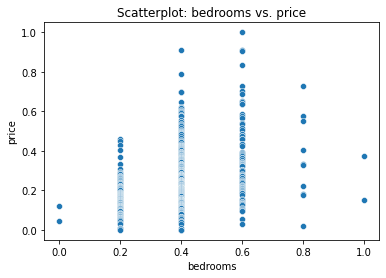

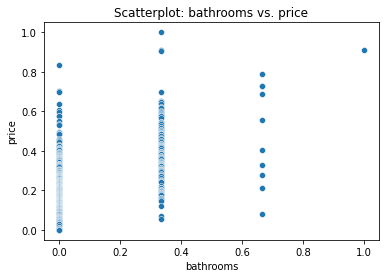

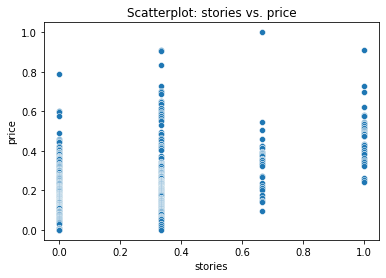

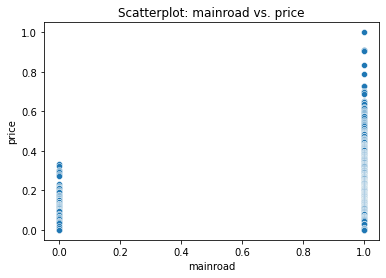

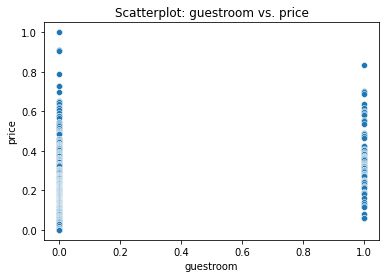

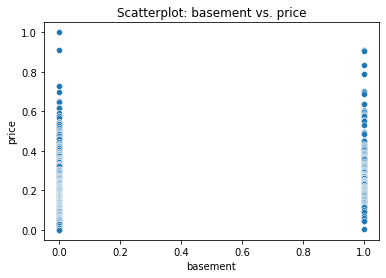

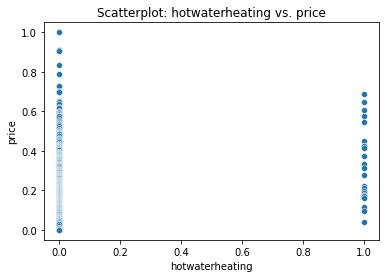

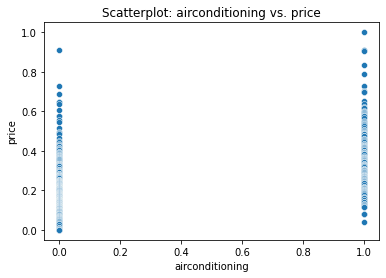

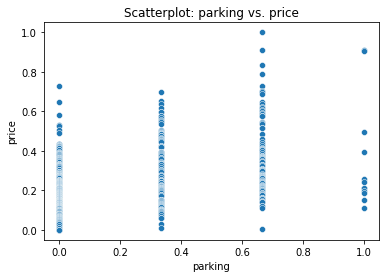

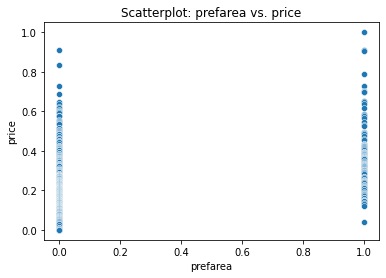

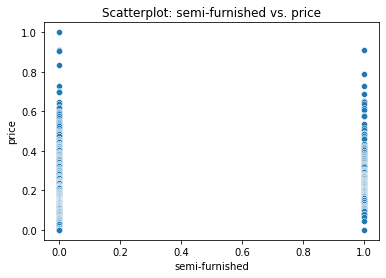

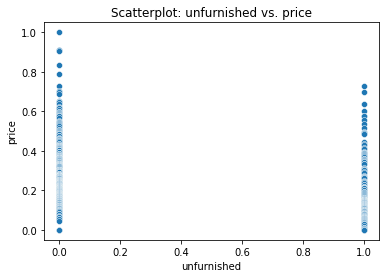

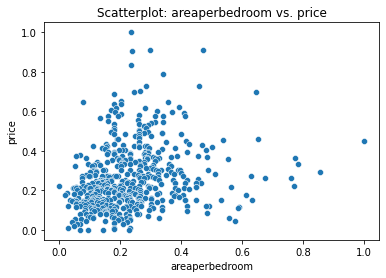

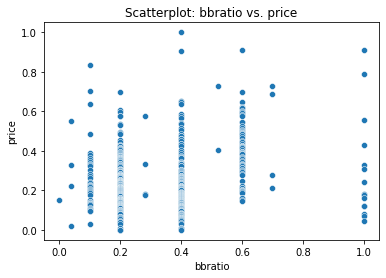

In [81]:
# Visualise the relationship between the features and the response using scatterplots
for feature in housing.columns:
    if feature != 'price':  
        sns.scatterplot(x=feature, y='price', data=housing)
        plt.title(f'Scatterplot: {feature} vs. price')
        plt.show()


In [84]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [86]:
# Adding a constant variable in X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

In [89]:
# fitting your third linear model with y_train and X_train_rfe
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

In [90]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           9.34e-83
Time:                        11:17:30   Log-Likelihood:                 374.96
No. Observations:                 436   AIC:                            -737.9
Df Residuals:                     430   BIC:                            -713.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0655      0.010     

In [91]:
# Calculating Vif scores on housing data with selected columns by RFE
vif_scores(housing[col])

,Feature,VIF Score
0,area,1.955661
1,bathrooms,1.546809
2,stories,1.981353
3,hotwaterheating,1.062917
4,airconditioning,1.708072


In [92]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]


# Adding a constant variable to X_test_rfe
X_test_rfe = sm.add_constant(X_test_rfe)


# Making predictions
y_pred = lm_3.predict(X_test_rfe)


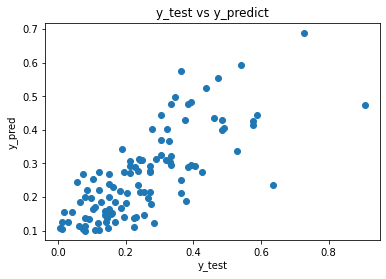

In [95]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_predict')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [96]:
# Print RMSE, MSE and MAE scores for your third model
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

RMSE: 0.107212757616606
MSE: 0.011494575395757108
MAE: 0.08167337604133845


In [97]:
#print summary of all 3 built models
print(lm_1.summary())
print(lm_2.summary())
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.84
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           3.31e-94
Time:                        11:26:53   Log-Likelihood:                 425.58
No. Observations:                 436   AIC:                            -819.2
Df Residuals:                     420   BIC:                            -753.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0892      0.058     